In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [387]:
df = pd.read_csv('usd_toman_history.csv')
df = df.set_index('date_pr')

In [388]:
df['presidency'] = None
df.loc['1360/07/18','presidency'] = 'Khamenei'
df.loc['1368/05/25','presidency'] = 'Rafsanjani'
df.loc['1376/05/12','presidency'] = 'Khatami'
df.loc['1384/05/12','presidency'] = 'AhmadiNezhad'
df.loc['1392/05/12','presidency'] = 'Rohani'
df.loc['1400/05/12','presidency'] = 'Raeesi'

In [389]:
df = df.reset_index()

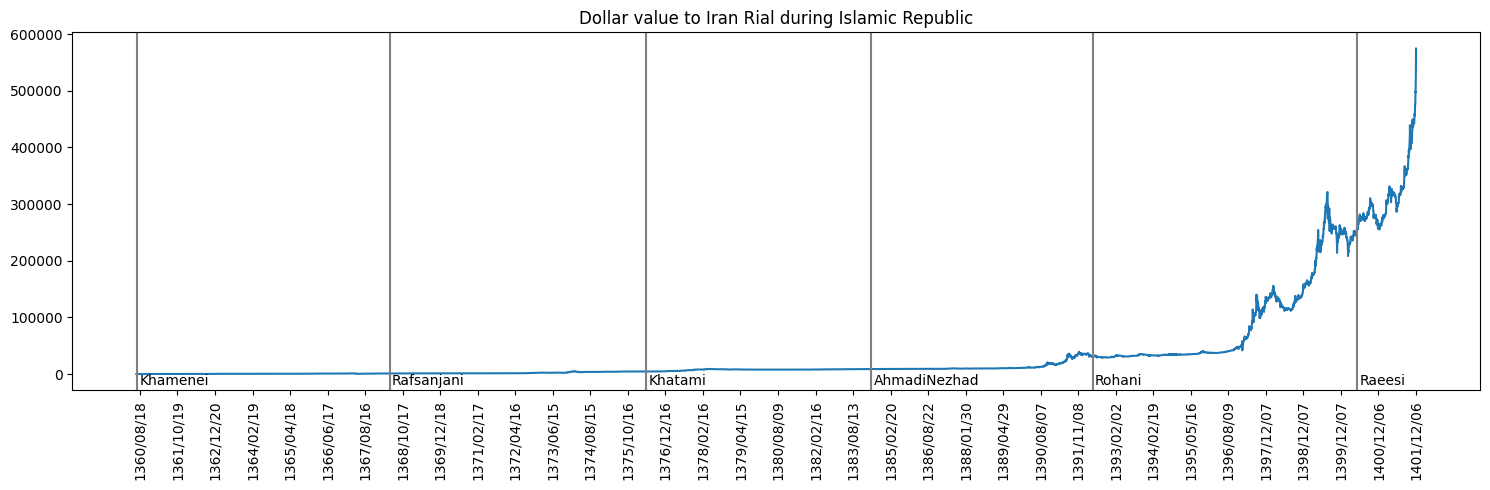

In [407]:
plt.figure(figsize=(15,5))
y = df.price_avg
x = np.arange(len(y))
dates = df.date_pr
plt.plot(x,y)



for i, row in df.dropna().iterrows():
    plt.axvline(x=i,color='gray')
    plt.annotate(text = row.presidency, xy = (i+20,-20000))



plt.xticks(x[::-365],dates[::-365],rotation=90)

plt.title('Dollar value to Iran Rial during Islamic Republic')
plt.tight_layout()
plt.savefig('total.png',dpi=900)
plt.show()

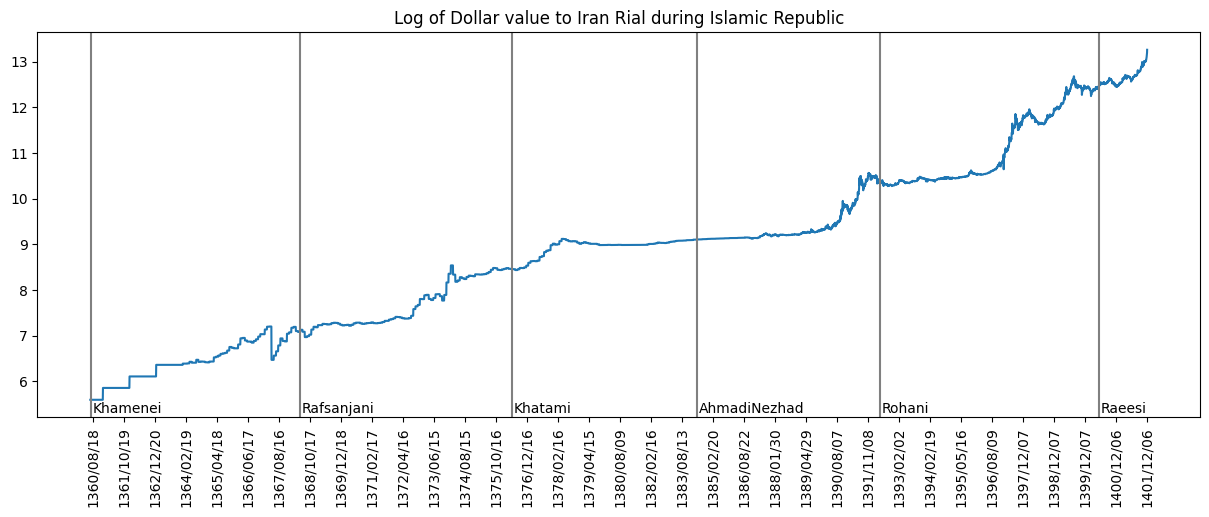

In [408]:
plt.figure(figsize=(15,5))
y = df.price_avg
x = np.arange(len(y))
dates = df.date_pr
plt.plot(x,np.log(y))



for i, row in df.dropna().iterrows():
    plt.axvline(x=i,color='gray')
    plt.annotate(text = row.presidency, xy = (i+20,5.3))



plt.xticks(x[::-365],dates[::-365],rotation=90)
plt.title('Log of Dollar value to Iran Rial during Islamic Republic')
plt.savefig('total_log.png',dpi=900)
plt.show()

In [392]:
def curvefit(x,y):
    A = np.vstack([x**i for i in range(2)]).T
    p = np.linalg.lstsq(A, y, rcond=None)[0]
    
    return p

In [393]:
summary_df = pd.DataFrame(index = ['Khamenei','Rafsanjani', 'Khatami','AhmadiNezhad','Rohani','Raeesi'], 
                      columns = ['Average Daily Growth Percentage'])

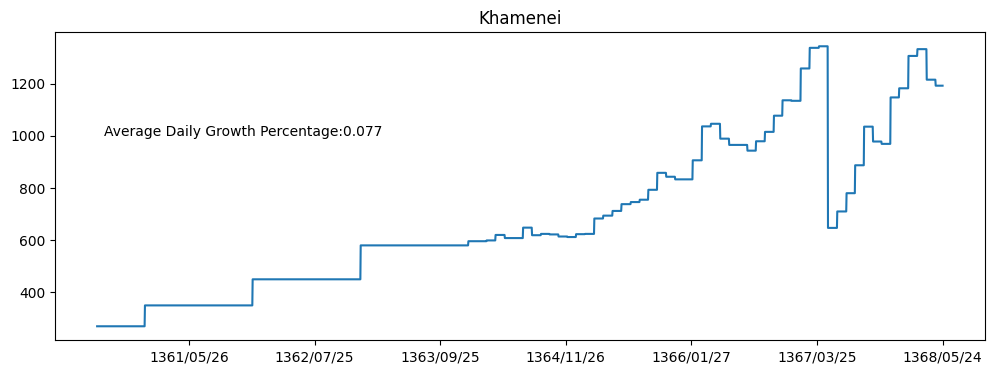

In [409]:
wdf = (df.loc[
    df[df.presidency == 'Khamenei'].index[0]:
    df[df.presidency == 'Rafsanjani'].index[0]-1]
      ).copy()
plt.figure(figsize=(12,4))
y = wdf.price_avg
x = np.arange(len(y))
p = curvefit(x,y)
dates = wdf.date_pr
plt.plot(x,y)
plt.xticks(x[::-365],dates[::-365])
plt.title('Khamenei')

av_d_g = wdf.price_avg.rolling(2).apply(lambda wsr: (wsr.iloc[1]-wsr.iloc[0])/wsr.iloc[0]).mean()*100
summary_df.loc['Khamenei','Average Daily Growth Percentage'] = av_d_g

plt.annotate(f'Average Daily Growth Percentage:{av_d_g:.3f}',xy=(20,1000))
plt.savefig('khamenie.png',dpi=900)
plt.show()

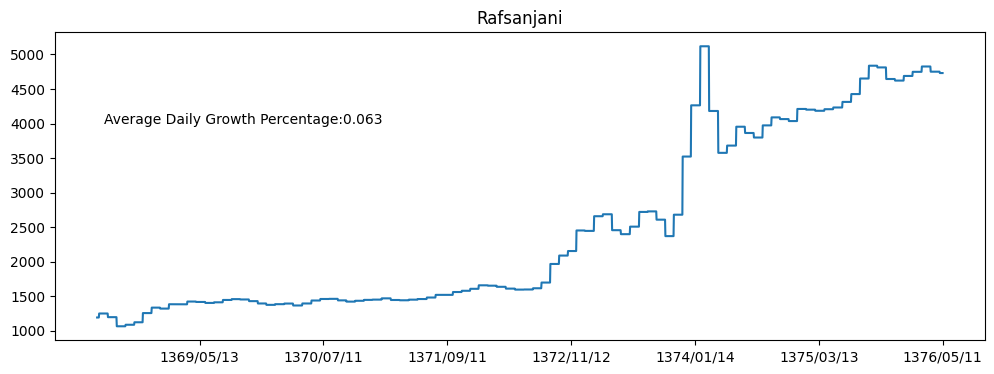

In [410]:
wdf = (df.loc[
    df[df.presidency == 'Rafsanjani'].index[0]:
    df[df.presidency == 'Khatami'].index[0]-1]
      ).copy()
plt.figure(figsize=(12,4))
y = wdf.price_avg
x = np.arange(len(y))
p = curvefit(x,y)
dates = wdf.date_pr
plt.plot(x,y)
plt.xticks(x[::-365],dates[::-365])
plt.title('Rafsanjani')
av_d_g = wdf.price_avg.rolling(2).apply(lambda wsr: (wsr.iloc[1]-wsr.iloc[0])/wsr.iloc[0]).mean()*100
summary_df.loc['Rafsanjani','Average Daily Growth Percentage'] = av_d_g
plt.annotate(f'Average Daily Growth Percentage:{av_d_g:.3f}',xy=(20,4000))
plt.savefig('Rafsanjani.png',dpi=900)
plt.show()

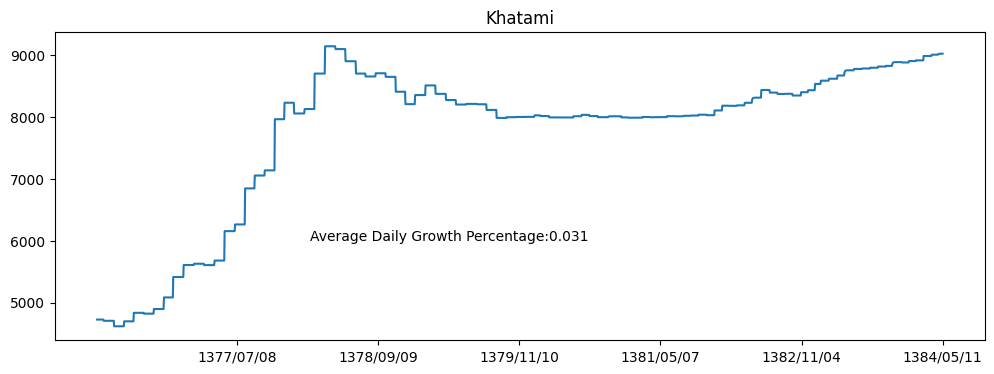

In [411]:
wdf = (df.loc[
    df[df.presidency == 'Khatami'].index[0]:
    df[df.presidency == 'AhmadiNezhad'].index[0]-1]
      ).copy()
plt.figure(figsize=(12,4))
y = wdf.price_avg
x = np.arange(len(y))
p = curvefit(x,y)
dates = wdf.date_pr
plt.plot(x,y)
plt.xticks(x[::-365],dates[::-365])
plt.title('Khatami')
av_d_g = wdf.price_avg.rolling(2).apply(lambda wsr: (wsr.iloc[1]-wsr.iloc[0])/wsr.iloc[0]).mean()*100
summary_df.loc['Khatami','Average Daily Growth Percentage'] = av_d_g
plt.annotate(f'Average Daily Growth Percentage:{av_d_g:.3f}',xy=(550,6000))
plt.savefig('Khatami.png',dpi=900)
plt.show()

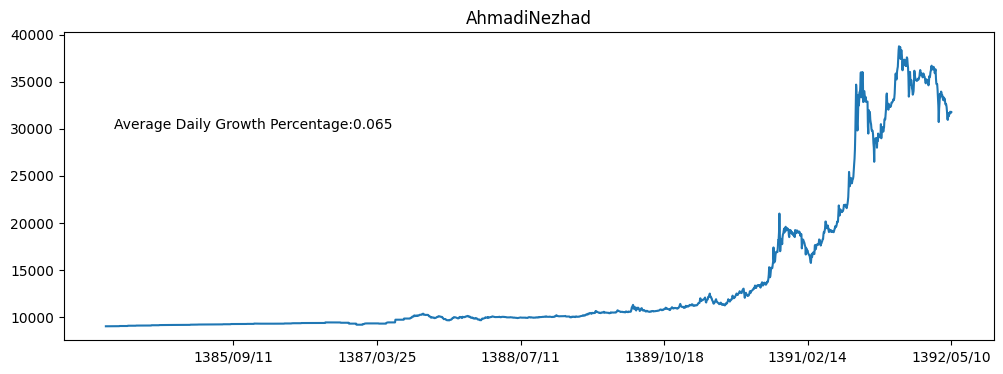

In [412]:
wdf = (df.loc[
    df[df.presidency == 'AhmadiNezhad'].index[0]:
    df[df.presidency == 'Rohani'].index[0]-1]
      ).copy()
plt.figure(figsize=(12,4))
y = wdf.price_avg
x = np.arange(len(y))
p = curvefit(x,y)
dates = wdf.date_pr
plt.plot(x,y)
plt.xticks(x[::-365],dates[::-365])
plt.title('AhmadiNezhad')

av_d_g = wdf.price_avg.rolling(2).apply(lambda wsr: (wsr.iloc[1]-wsr.iloc[0])/wsr.iloc[0]).mean()*100
summary_df.loc['AhmadiNezhad','Average Daily Growth Percentage'] = av_d_g
plt.annotate(f'Average Daily Growth Percentage:{av_d_g:.3f}',xy=(20,30000))
plt.savefig('AhmadiNezhad.png',dpi=900)
plt.show()

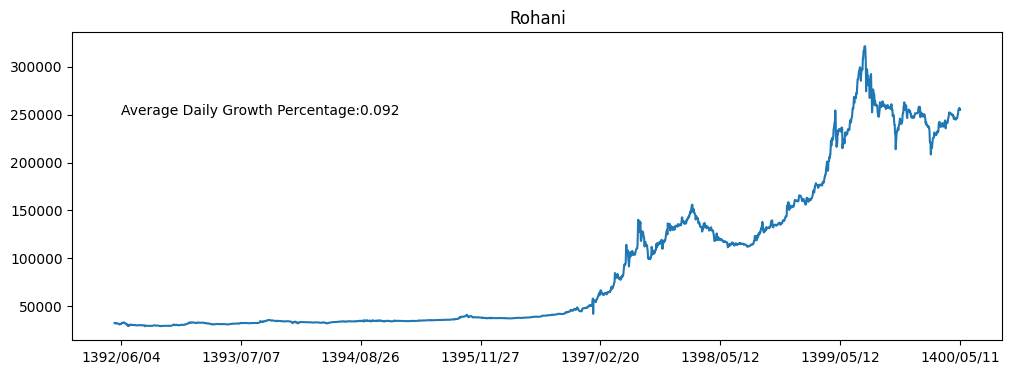

In [413]:
wdf = (df.loc[
    df[df.presidency == 'Rohani'].index[0]:
    df[df.presidency == 'Raeesi'].index[0]-1]
      ).copy()
plt.figure(figsize=(12,4))
y = wdf.price_avg
x = np.arange(len(y))
p = curvefit(x,y)
dates = wdf.date_pr
plt.plot(x,y)
plt.xticks(x[::-365],dates[::-365])
plt.title('Rohani')

av_d_g = wdf.price_avg.rolling(2).apply(lambda wsr: (wsr.iloc[1]-wsr.iloc[0])/wsr.iloc[0]).mean()*100
summary_df.loc['Rohani','Average Daily Growth Percentage'] = av_d_g
plt.annotate(f'Average Daily Growth Percentage:{av_d_g:.3f}',xy=(20,250000))
plt.savefig('Rohani.png',dpi=900)
plt.show()

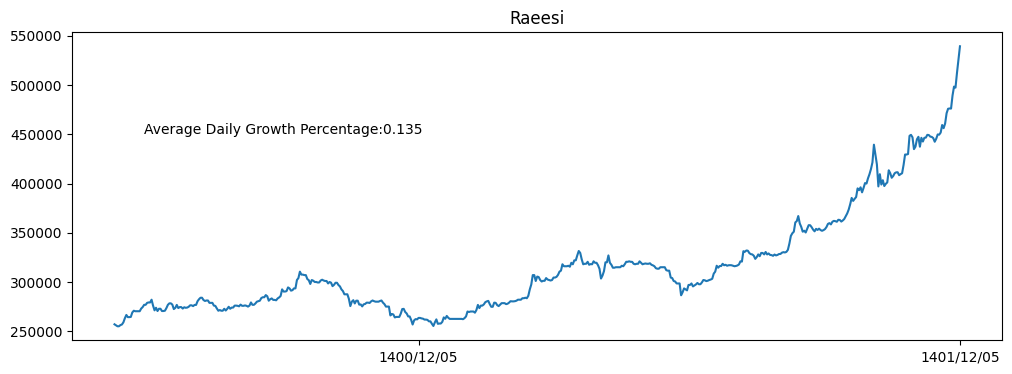

In [414]:
wdf = (df.iloc[
    df[df.presidency == 'Raeesi'].index[0]:-1]
      ).copy()
plt.figure(figsize=(12,4))
y = wdf.price_avg
x = np.arange(len(y))
p = curvefit(x,y)
dates = wdf.date_pr
plt.plot(x,y)
plt.xticks(x[::-365],dates[::-365])
plt.title('Raeesi')
av_d_g = wdf.price_avg.rolling(2).apply(lambda wsr: (wsr.iloc[1]-wsr.iloc[0])/wsr.iloc[0]).mean()*100
summary_df.loc['Raeesi','Average Daily Growth Percentage'] = av_d_g
plt.annotate(f'Average Daily Growth Percentage:{av_d_g:.3f}',xy=(20,450000))
plt.savefig('Raeesi.png',dpi=900)
plt.show()

In [415]:
import dataframe_image as dfi

In [400]:
summary_df

,Average Daily Growth Percentage
Khamenei,0.07742
Rafsanjani,0.062994
Khatami,0.030684
AhmadiNezhad,0.065124
Rohani,0.091848
Raeesi,0.135101


In [416]:
dfi.export(summary_df, 'summary_df.png')

In [401]:
summary_df.sort_values('Average Daily Growth Percentage')

,Average Daily Growth Percentage
Khatami,0.030684
Rafsanjani,0.062994
AhmadiNezhad,0.065124
Khamenei,0.07742
Rohani,0.091848
Raeesi,0.135101


In [417]:
dfi.export(summary_df.sort_values('Average Daily Growth Percentage'), 'summary_df_sorted.png')